In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt


In [3]:
import statsmodels.api as sm
import random
import collections

In [4]:
from datetime import datetime

In [5]:
weather_df=pd.read_csv("data/weather_data_2sites.csv", parse_dates=['timestamp'])
weather_df

,Unnamed: 0,timestamp,temperature_site1,humidity_site1,temperature_site2,humidity_site2
0,0,2018-03-01 00:00:00,NaN,NaN,23.1,61.6
1,1,2018-03-01 00:30:00,21.0,68.0,22.9,61.1
2,2,2018-03-01 01:00:00,20.0,73.0,23.0,61.6
3,3,2018-03-01 01:30:00,20.0,73.0,22.9,62.5
4,4,2018-03-01 02:00:00,20.0,73.0,22.4,63.4
...,...,...,...,...,...,...
5775,5775,2018-06-29 01:00:00,28.0,84.0,31.1,67.2
5776,5776,2018-06-29 01:30:00,28.0,84.0,31.1,67.2
5777,5777,2018-06-29 02:00:00,28.0,84.0,31.1,67.2
5778,5778,2018-06-29 02:30:00,28.0,84.0,31.1,67.2


In [6]:
weather_df['timestamp']= weather_df['timestamp'].dt.strftime('%d/%m/%Y %H:%M:%S')
weather_df

,Unnamed: 0,timestamp,temperature_site1,humidity_site1,temperature_site2,humidity_site2
0,0,01/03/2018 00:00:00,NaN,NaN,23.1,61.6
1,1,01/03/2018 00:30:00,21.0,68.0,22.9,61.1
2,2,01/03/2018 01:00:00,20.0,73.0,23.0,61.6
3,3,01/03/2018 01:30:00,20.0,73.0,22.9,62.5
4,4,01/03/2018 02:00:00,20.0,73.0,22.4,63.4
...,...,...,...,...,...,...
5775,5775,29/06/2018 01:00:00,28.0,84.0,31.1,67.2
5776,5776,29/06/2018 01:30:00,28.0,84.0,31.1,67.2
5777,5777,29/06/2018 02:00:00,28.0,84.0,31.1,67.2
5778,5778,29/06/2018 02:30:00,28.0,84.0,31.1,67.2


In [48]:
weather_df[['Date','Time']] = weather_df['timestamp'].str.split(' ',1,expand=True) 
weather_df

,Unnamed: 0,timestamp,temperature_site1,humidity_site1,temperature_site2,humidity_site2,Date,Timestamp,Time
0,0,01/03/2018 00:00:00,NaN,NaN,23.1,61.6,01/03/2018,00:00:00,00:00:00
1,1,01/03/2018 00:30:00,21.0,68.0,22.9,61.1,01/03/2018,00:30:00,00:30:00
2,2,01/03/2018 01:00:00,20.0,73.0,23.0,61.6,01/03/2018,01:00:00,01:00:00
3,3,01/03/2018 01:30:00,20.0,73.0,22.9,62.5,01/03/2018,01:30:00,01:30:00
4,4,01/03/2018 02:00:00,20.0,73.0,22.4,63.4,01/03/2018,02:00:00,02:00:00
...,...,...,...,...,...,...,...,...,...
5775,5775,29/06/2018 01:00:00,28.0,84.0,31.1,67.2,29/06/2018,01:00:00,01:00:00
5776,5776,29/06/2018 01:30:00,28.0,84.0,31.1,67.2,29/06/2018,01:30:00,01:30:00
5777,5777,29/06/2018 02:00:00,28.0,84.0,31.1,67.2,29/06/2018,02:00:00,02:00:00
5778,5778,29/06/2018 02:30:00,28.0,84.0,31.1,67.2,29/06/2018,02:30:00,02:30:00


In [8]:
time=np.arange(0,24,0.5)

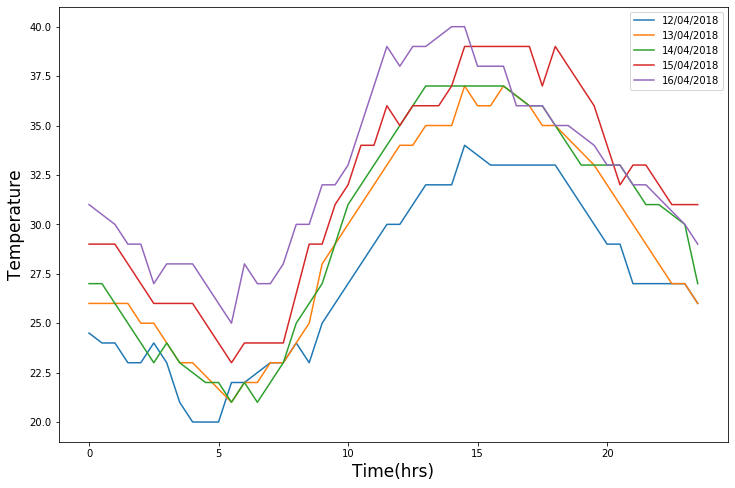

In [9]:

fig=plt.figure(figsize=(12,8))
days=['12/04/2018','13/04/2018','14/04/2018','15/04/2018','16/04/2018']

for day in days:
    weather_df_days= weather_df[weather_df['Date']==day]
    plt.plot(time,weather_df_days['temperature_site1'],label= day)
    plt.legend()
    
plt.xlabel('Time(hrs)',size=17)
plt.ylabel('Temperature',size=17)
plt.show()


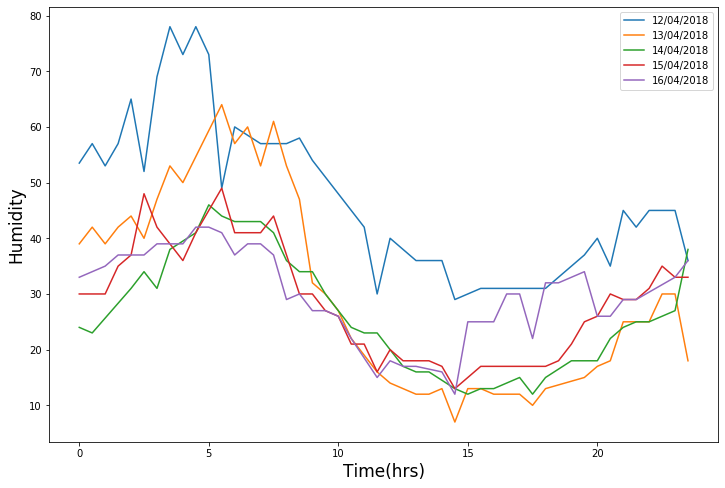

In [10]:
fig=plt.figure(figsize=(12,8))
days=['12/04/2018','13/04/2018','14/04/2018','15/04/2018','16/04/2018']

for day in days:
    weather_df_days= weather_df[weather_df['Date']==day]
    plt.plot(time,weather_df_days['humidity_site1'],label= day)
    plt.legend()

    
plt.xlabel('Time(hrs)',size=17)
plt.ylabel('Humidity',size=17)
plt.show()


In [18]:
fig=plt.figure(figsize=(12,8))
days=['12/04/2018','13/04/2018','14/04/2018','15/04/2018','16/04/2018']

weather_df_days=pd.DataFrame()
for day in days:
    weather_df_day= weather_df[weather_df['Date']==day]
    weather_df_days= pd.concat([weather_df_days,weather_df_day])

    
weather_df_days

,Unnamed: 0,timestamp,temperature_site1,humidity_site1,temperature_site2,humidity_site2,Date,Timestamp
2022,2022,12/04/2018 00:00:00,24.500000,53.500000,25.4,57.1,12/04/2018,00:00:00
2023,2023,12/04/2018 00:30:00,24.000000,57.000000,25.6,58.6,12/04/2018,00:30:00
2024,2024,12/04/2018 01:00:00,24.000000,53.000000,25.2,60.0,12/04/2018,01:00:00
2025,2025,12/04/2018 01:30:00,23.000000,57.000000,25.6,59.6,12/04/2018,01:30:00
2026,2026,12/04/2018 02:00:00,23.000000,65.000000,25.4,60.5,12/04/2018,02:00:00
...,...,...,...,...,...,...,...,...
2257,2257,16/04/2018 21:30:00,32.000000,29.000000,32.4,33.9,16/04/2018,21:30:00
2258,2258,16/04/2018 22:00:00,31.333333,30.333333,32.2,35.0,16/04/2018,22:00:00
2259,2259,16/04/2018 22:30:00,30.666667,31.666667,31.9,36.1,16/04/2018,22:30:00
2260,2260,16/04/2018 23:00:00,30.000000,33.000000,31.8,37.2,16/04/2018,23:00:00


<Figure size 864x576 with 0 Axes>

Text(0.5, 0, 'Date')

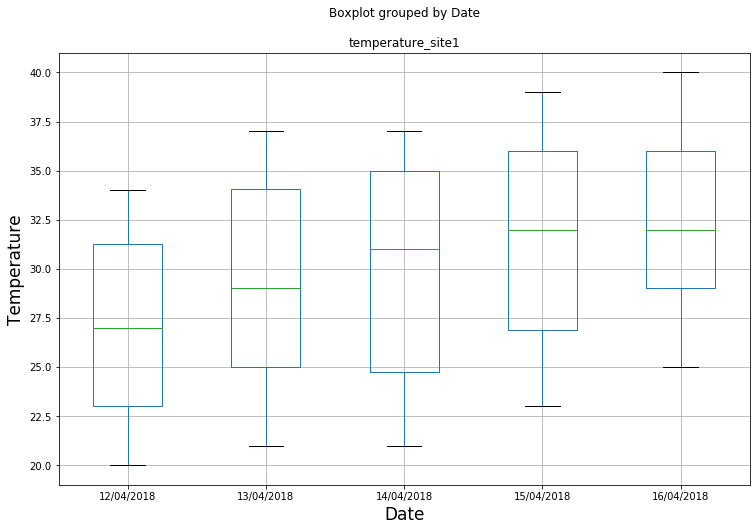

In [37]:

weather_df_days.boxplot(column ='temperature_site1',by='Date',figsize=(12,8))
plt.ylabel('Temperature',size=17)
plt.xlabel('Date',size=17)


Text(0.5, 0, 'Date')

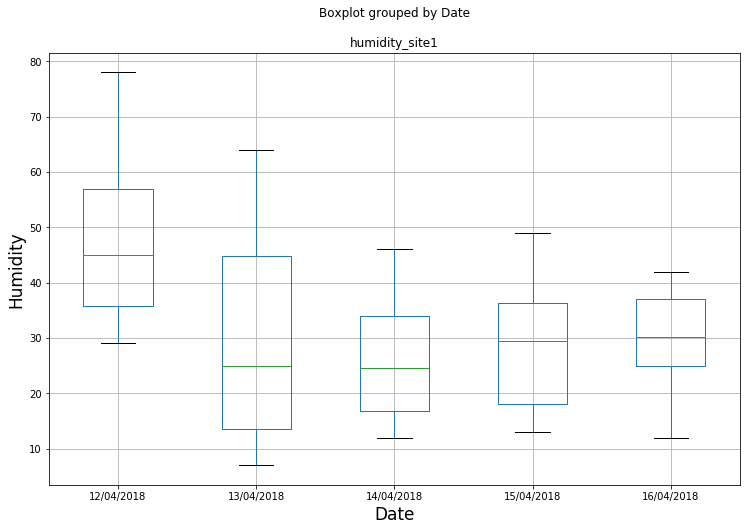

In [36]:
weather_df_days.boxplot(column ='humidity_site1',by='Date',figsize=(12,8))
plt.ylabel('Humidity',size=17)
plt.xlabel('Date',size=17)

In [38]:
weather_df_day1= weather_df[weather_df['Date']=='12/04/2018']
weather_df_day1

,Unnamed: 0,timestamp,temperature_site1,humidity_site1,temperature_site2,humidity_site2,Date,Timestamp
2022,2022,12/04/2018 00:00:00,24.5,53.5,25.4,57.1,12/04/2018,00:00:00
2023,2023,12/04/2018 00:30:00,24.0,57.0,25.6,58.6,12/04/2018,00:30:00
2024,2024,12/04/2018 01:00:00,24.0,53.0,25.2,60.0,12/04/2018,01:00:00
2025,2025,12/04/2018 01:30:00,23.0,57.0,25.6,59.6,12/04/2018,01:30:00
2026,2026,12/04/2018 02:00:00,23.0,65.0,25.4,60.5,12/04/2018,02:00:00
2027,2027,12/04/2018 02:30:00,24.0,52.0,25.5,59.6,12/04/2018,02:30:00
2028,2028,12/04/2018 03:00:00,23.0,69.0,25.2,60.5,12/04/2018,03:00:00
2029,2029,12/04/2018 03:30:00,21.0,78.0,24.6,61.9,12/04/2018,03:30:00
2030,2030,12/04/2018 04:00:00,20.0,73.0,24.0,57.4,12/04/2018,04:00:00
2031,2031,12/04/2018 04:30:00,20.0,78.0,23.1,60.2,12/04/2018,04:30:00


In [39]:
weather_df_day2= weather_df[weather_df['Date']=='13/04/2018']
weather_df_day2

,Unnamed: 0,timestamp,temperature_site1,humidity_site1,temperature_site2,humidity_site2,Date,Timestamp
2070,2070,13/04/2018 00:00:00,26.000000,39.000000,27.5,43.4,13/04/2018,00:00:00
2071,2071,13/04/2018 00:30:00,26.000000,42.000000,27.2,44.9,13/04/2018,00:30:00
2072,2072,13/04/2018 01:00:00,26.000000,39.000000,27.5,45.5,13/04/2018,01:00:00
2073,2073,13/04/2018 01:30:00,26.000000,42.000000,27.6,46.6,13/04/2018,01:30:00
2074,2074,13/04/2018 02:00:00,25.000000,44.000000,27.3,47.6,13/04/2018,02:00:00
2075,2075,13/04/2018 02:30:00,25.000000,40.000000,27.2,47.1,13/04/2018,02:30:00
2076,2076,13/04/2018 03:00:00,24.000000,47.000000,27.0,47.0,13/04/2018,03:00:00
2077,2077,13/04/2018 03:30:00,23.000000,53.000000,26.7,45.4,13/04/2018,03:30:00
2078,2078,13/04/2018 04:00:00,23.000000,50.000000,26.3,47.5,13/04/2018,04:00:00
2079,2079,13/04/2018 04:30:00,22.333333,54.666667,26.2,47.5,13/04/2018,04:30:00


In [40]:
weather_df_day3= weather_df[weather_df['Date']=='14/04/2018']
weather_df_day3

,Unnamed: 0,timestamp,temperature_site1,humidity_site1,temperature_site2,humidity_site2,Date,Timestamp
2118,2118,14/04/2018 00:00:00,27.0,24.000000,28.5,32.4,14/04/2018,00:00:00
2119,2119,14/04/2018 00:30:00,27.0,23.000000,28.5,32.4,14/04/2018,00:30:00
2120,2120,14/04/2018 01:00:00,26.0,25.666667,28.2,32.4,14/04/2018,01:00:00
2121,2121,14/04/2018 01:30:00,25.0,28.333333,28.0,32.3,14/04/2018,01:30:00
2122,2122,14/04/2018 02:00:00,24.0,31.000000,28.0,32.3,14/04/2018,02:00:00
2123,2123,14/04/2018 02:30:00,23.0,34.000000,28.0,32.3,14/04/2018,02:30:00
2124,2124,14/04/2018 03:00:00,24.0,31.000000,27.7,32.3,14/04/2018,03:00:00
2125,2125,14/04/2018 03:30:00,23.0,38.000000,27.7,32.3,14/04/2018,03:30:00
2126,2126,14/04/2018 04:00:00,22.5,39.500000,27.1,34.0,14/04/2018,04:00:00
2127,2127,14/04/2018 04:30:00,22.0,41.000000,26.9,34.5,14/04/2018,04:30:00


In [49]:
weather_df_scatter=pd.DataFrame({'Temperature_day1': np.array(weather_df_day1['temperature_site1']),
                                'Humidity_day1': np.array(weather_df_day1['humidity_site1']),
                                'Temperature_day2': np.array(weather_df_day2['temperature_site1']),
                                'Humidity_day2': np.array(weather_df_day2['humidity_site1']),
                                'Temperature_day3': np.array (weather_df_day3['temperature_site1']),
                                'Humidity_day3':np.array(weather_df_day3['humidity_site1'] ) })
weather_df_scatter

,Temperature_day1,Humidity_day1,Temperature_day2,Humidity_day2,Temperature_day3,Humidity_day3
0,24.5,53.5,26.000000,39.000000,27.0,24.000000
1,24.0,57.0,26.000000,42.000000,27.0,23.000000
2,24.0,53.0,26.000000,39.000000,26.0,25.666667
3,23.0,57.0,26.000000,42.000000,25.0,28.333333
4,23.0,65.0,25.000000,44.000000,24.0,31.000000
5,24.0,52.0,25.000000,40.000000,23.0,34.000000
6,23.0,69.0,24.000000,47.000000,24.0,31.000000
7,21.0,78.0,23.000000,53.000000,23.0,38.000000
8,20.0,73.0,23.000000,50.000000,22.5,39.500000
9,20.0,78.0,22.333333,54.666667,22.0,41.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BD4C9239C8>,
      dtype=object)

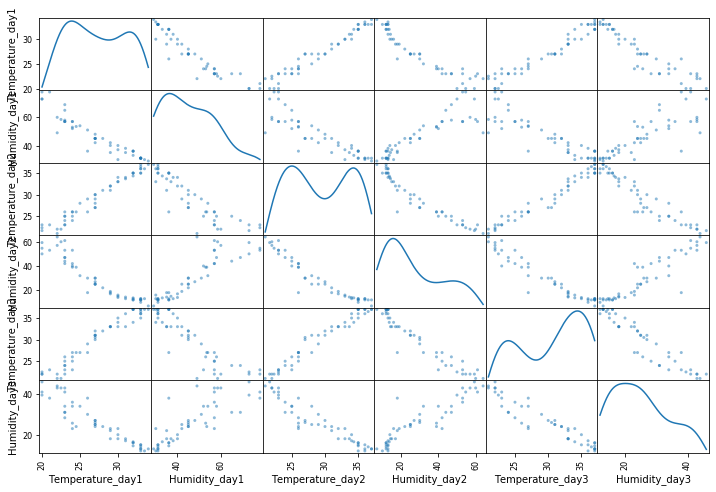

In [59]:
pd.plotting.scatter_matrix(weather_df_scatter,diagonal='kde',figsize=(12,8))